# Noise 
## Random Noise. Perlin Noise.

In [1]:
%matplotlib inline

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#not really needed, just fixes a few export issues:
from jinja2.utils import markupsafe 
markupsafe.Markup()
from importlib import reload
plt=reload(plt)

### Introduction

This is an article about __content generation through algorithms__.<br>
It sounds fancy, but the idea is a simple one - to generate textures or materials automatically, from numbers. Without real drawing in "Paint" or in another PC program.</p> With other words, if we have the following binary `np.array` in `python`:
```python
example = [[1, 0], [0, 1]]
```
we would be able to generate the following image with it in python easily: ![](data\pics\example_image_4.png)
Ok, it is quite visible, that somehow we have plotted the `0` as a black square and the `1` as white squire. 
Is this useful somehow? Probably, if you feel like building online chess boards and you can find someone to pay you for that. Anyway, the idea is to make it a bit more complicated from there, as 
between 1 and 0 we have enough values, and we will be able to generate something more interesting, based on the numbers there.

So, if the numbers are a bit random, we will get some random noise, that will look really not following any pattern, like this:
![](data\pics\example_random_01.png)
The idea of this article is to provide a tool, to build noise, that looks like it is not-random (but it is random!):
![](data\pics\example_perlin_01.png)
<br>
This, non-random looking noise that we will be building is called "Perlin Noise" and is an extremely powerful algorithm that is used often in procedural content generation.[1] It is especially useful for games and other visual media such as movies.[1] Named after [Ken Perlin](https://en.wikipedia.org/wiki/Ken_Perlin), this technique earned him an "Oscar" for its originality. In game development, Perlin Noise can be used for any sort of wave-like, undulating material or texture. For example, it could be used for procedural terrain (Minecraft-like terrain can be created with Perlin Noise, for example), fire effects, water, and clouds.[1] 
Generally, Perlin Noise has a more organic appearance because it produces a naturally ordered ("smooth") sequence of pseudo-random numbers.[2]

## Research Questions:

A good research question can be defined as __How to build Perlin Noise in python?__ <br> A subquestion can be __How to distinguish random noise from Perlin Noise?__ 

## A few lines about random noise (with examples)

Before going into Perlin Noise, it will be useful to get a few examples of non-Perlin Noise. Let's plot a `6x6` non-random `np.array()`, just to see how it works:

In [4]:
def plot_noise(noise, plt_title, cmap_given = "gray"):
    plt.imshow(noise, cmap=cmap_given, interpolation='nearest')
    #plt.colorbar()
    plt.title(plt_title)
    plt.show()

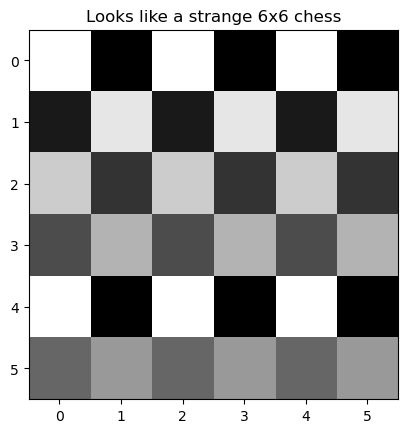

In [5]:
non_random_noise = [
    [1,   0,  1,  0,  1,  0],
    [.1, .9, .1, .9, .1, .9],
    [.8, .2, .8, .2, .8, .2],
    [.3, .7, .3, .7, .3, .7],
    [1,   0,  1,  0,  1,  0],
    [.4, .6, .4, .6, .4, .6]
]

plot_noise(non_random_noise,'Looks like a strange 6x6 chess')

Well, the picture above looks like strange 6x6 chess, with some squares in white and some in grey or being black completely. As discussed in the introduction, this is due to the fact that all the numbers between `0` and `1` can be plotted in the grey colors schema between black and white.
<BR>
Let's continue with random, non-Perlin noises. First we will plot some `8x8` random noises and then we will plot `10000x10000`.

In [6]:
def generate_random_noise(width, height):
    noise = np.random.rand(width, height)
    return noise

In [7]:
def make_some_noise(size, label=""):
    width = size
    height = size
    random_noise = generate_random_noise(width, height)

    # Plot the noise
    plot_noise(random_noise, label)

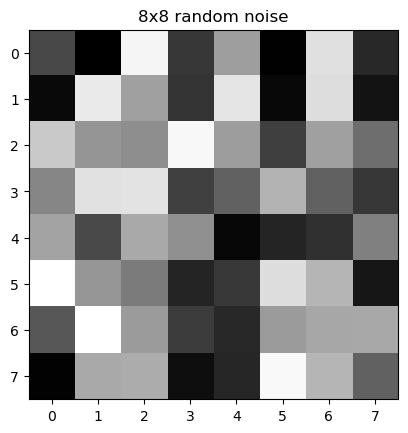

In [8]:
# Generate tiny random noise
size = 8
title = "8x8 random noise"
make_some_noise(size, title)

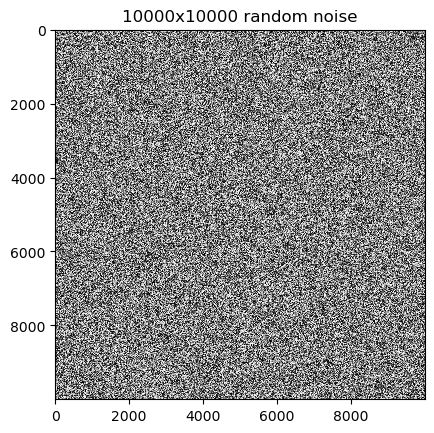

In [9]:
# Generate huge random noise
size = 10000
title = "10000x10000 random noise"
make_some_noise(size, title)

Well, it is obvious that the noises are random. But are these Perlin Noises? In general, the answer is simple __no__, but proving so might require a bit of an effort. The easiest way to prove it, is to open the noise plot in paint and to cut something:
![](data\pics\random_noise_22.png)
If we can paste it anywhere in the picture without having the picture "distroyed" and without seeing where exactly did we paste it, then it is not a __Perlin noise__:
![](data\pics\random_noise_33.png)

## Perlin noise methodology

In this part of the article, an explanation for the "Perlin noise" is to be written.
And then the code. At the end the nice random pictures, that are nice, because they look non-random.

1. Create an empty noise array
2. Generate random gradient vectors
3. Iterate over each pixel in the noise array and
    - Calculate the grid cell coordinates for the current pixel
    - Calculate the position within the cell as fractional offsets
    - Calculate the dot products between gradients and offsets
    - Interpolate the dot products using smoothstep function
    - Store the interpolated value in the noise array
4. Normalize the noise values within the range of 0 to 1

In [10]:
def generate_perlin_noise(width, height, scale):
    """
    Generate Perlin noise using the given parameters.
    
    Parameters:
    - width (int): Width of the noise array.
    - height (int): Height of the noise array.
    - scale (int): Scale factor for generating the noise.
    
    Returns:
    - noise (n-dimensional array): Perlin noise array of shape (height, width).
    """

    
    # Create an empty noise array
    noise = np.zeros((height, width))
    
    # Generate random gradient vectors
    gradients = np.random.randn(height // scale + 2, width // scale + 2, 2)

    # Iterate over each pixel in the noise array
    for y in range(height):
        for x in range(width):
            # Calculate the grid cell coordinates for the current pixel
            cell_x = x // scale
            cell_y = y // scale

            # Calculate the position within the cell as fractional offsets
            cell_offset_x = x / scale - cell_x
            cell_offset_y = y / scale - cell_y

            # Calculate the dot products between gradients and offsets
            dot_product_tl = np.dot([cell_offset_x, cell_offset_y], gradients[cell_y, cell_x])
            dot_product_tr = np.dot([cell_offset_x - 1, cell_offset_y], gradients[cell_y, cell_x + 1])
            dot_product_bl = np.dot([cell_offset_x, cell_offset_y - 1], gradients[cell_y + 1, cell_x])
            dot_product_br = np.dot([cell_offset_x - 1, cell_offset_y - 1], gradients[cell_y + 1, cell_x + 1])
          
            # Interpolate the dot products using smoothstep function
            weight_x = smoothstep(cell_offset_x)
            weight_y =  smoothstep(cell_offset_y)
            interpolated_top = lerp(dot_product_tl, dot_product_tr, weight_x)
            interpolated_bottom = lerp(dot_product_bl, dot_product_br, weight_x)
            interpolated_value = lerp(interpolated_top, interpolated_bottom, weight_y)

            # Store the interpolated value in the noise array
            noise[y, x] = interpolated_value
            
    # Normalize the noise values within the range of 0 to 1
    noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))

    return noise

def smoothstep(t):
    """
    Smoothstep function for interpolation.
    
    Parameters:
    - t (float): Interpolation value between 0.0 and 1.0.
    
    Returns:
    - result (float): Smoothstep interpolated value.
    """
    return t * t * (3 - 2 * t)

def lerp(a, b, t):
    """
    Linear interpolation between two values.
    
    Parameters:
    - a (float): Start value.
    - b (float): End value.
    - t (float): Interpolation factor between 0.0 and 1.0.
    
    Returns:
    - result (float): Interpolated value between a and b.
    """
    return a + t * (b - a)

Now, let's run the code, with the provided functions.

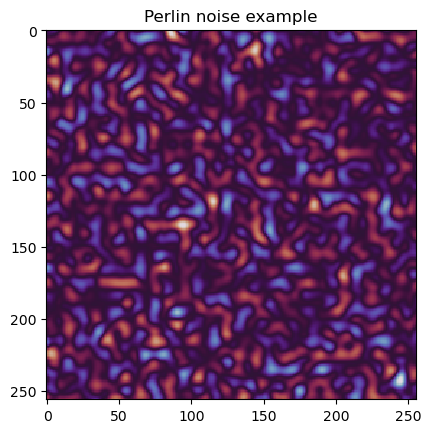

In [11]:
# Set the width, height, and scale parameters
width = 256
height = 256
scale = 10

# Generate the Perlin noise
noise = generate_perlin_noise(width, height, scale)

# Plot the Perlin noise
plot_noise(noise, "Perlin noise example", cmap_given = "twilight")


Looks ok-ish, but we may try all the `supported_cmap` values, built-in matplotlib. In the `supported_cmap` list, add the commented values to the list, to see all of the possible cases. It might take up to 1 minute to generate all, that is why I have commented most of these.

In [12]:
supported_cmap = ['Accent', 'Accent_r', 'Blues', 'Blues_r', ]#'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

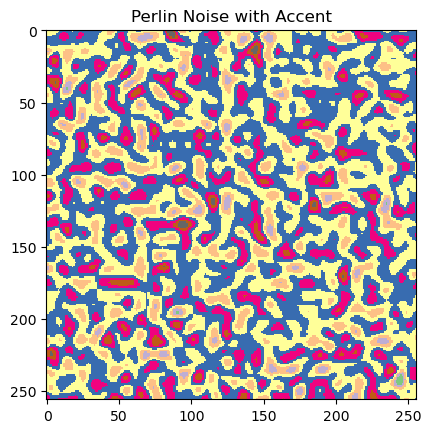

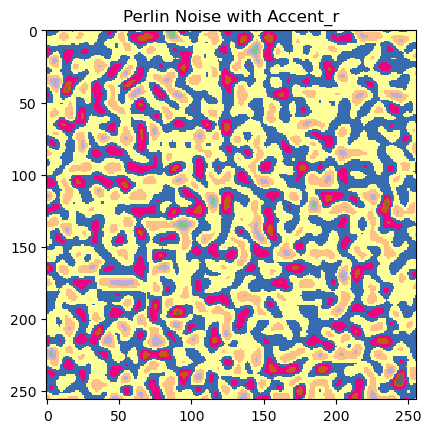

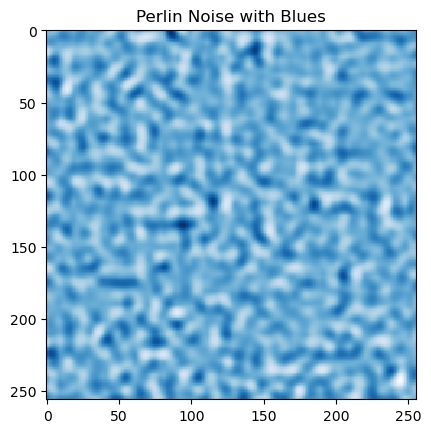

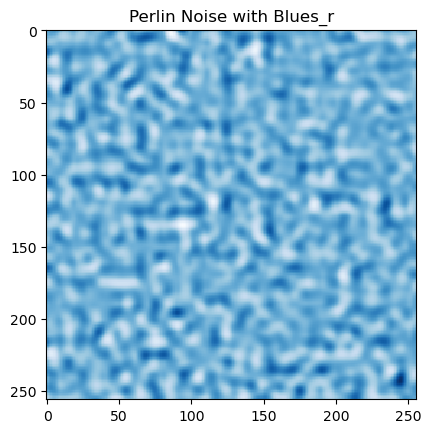

In [13]:
for cmap in supported_cmap:
    plot_noise(noise, f'Perlin Noise with {cmap}', cmap_given = cmap)

# Conclusion

In this article, we explored Perlin Noise and how it can be used to create interesting patterns.

The Perlin Noise algorithm works in a step-by-step manner to generate natural-looking random patterns (Or with other words - non-random looking random numbers). The algorithm starts by creating an empty grid where the noise values are stored. Then, random gradients are generated to serve as reference vectors for calculations.

The algorithm goes through each pixel in the grid and determines its position within the grid. By using fractional offsets, it calculates the dot products between the gradients and the offsets. These dot products are then blended together using a smooth function to create smooth transitions between the grid points, hence the borders between these are made a bit "invisble". 
The resulting value is stored in the grid as the noise value for that pixel. To ensure that the noise values are in a desired range, a normalization step is performed. This step scales the noise values to a range between 0 and 1, making them easier to work with.

By following this methodology, we can generate random patterns that express natural phenomena like fire, clouds, textures.

In conclusion, Perlin Noise is a powerful technique enabling the quick creation of visually interesting and realistic random patterns. As next steps one can concentrate on additional examples and applications of Perlin Noise - for instance, it can explore how Perlin Noise can be used to generate realistic terrain heightmaps for games or create textures for 3D modeling.

# Attachments 
## Tests 

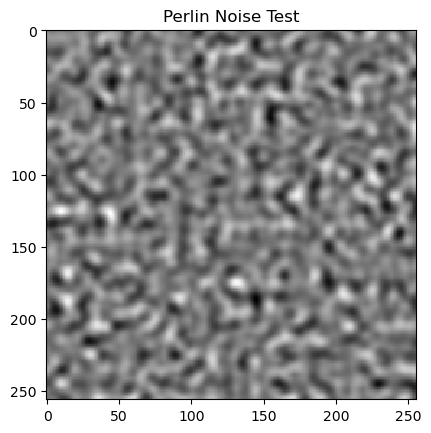

In [14]:
def test_perlin_noise():
    # Set test parameters
    width = 256
    height = 256
    scale = 10

    # Generate Perlin noise
    noise = generate_perlin_noise(width, height, scale)

    # Ensure the generated noise array has the correct shape
    assert noise.shape == (height, width), "Incorrect shape"

    # Ensure all values in the noise array are within the expected range
    assert np.min(noise) >= 0, "Min noise value is less than 0"
    assert np.max(noise) <= 1, "Max noise value is more than 1"

    # Plot the Perlin noise
    plot_noise(noise, "Perlin Noise Test", cmap_given = "gray")
    
# Run the test
test_perlin_noise()

## Sources:
+ [1] [adrianb.io](https://adrianb.io/2014/08/09/perlinnoise.html)
+ [2] [natureofcode.com/book](https://natureofcode.com/book/introduction/)